# **Setup**



In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import nltk
from nltk import word_tokenize
from nltk import WordNetLemmatizer
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, GRU, Input,Bidirectional,InputLayer,LeakyReLU
from keras.layers import Conv2D, MaxPooling2D, Conv1D,MaxPooling1D
from keras import backend as k
from keras.preprocessing.text import Tokenizer, hashing_trick
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras import Model
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from numpy import interp
from cycler import cycler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [ ]:
# mount your Google Drive
drive.mount("/content/gdrive") 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Misc Setup**

In [ ]:
path=F'/content/gdrive/My Drive/Data606/Data/Foreign_Exchange_Rates.csv'
df=pd.read_csv(path)
df=df.drop('Unnamed: 0', axis=1)
df=df.replace(to_replace='ND', value=np.NaN)
df=df.set_index('Time Serie')
df = df.apply(pd.to_numeric)
df.head(1000)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.9640,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.9340,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.9350,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.9400,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-10-27,1.4209,0.8502,1.6402,0.5899,2.8710,1.3107,8.2767,7.7541,45.40,1183.0,11.1195,6.880,1.7430,6.3230,108.38,3.8,7.0230,7.7250,94.45,1.3159,33.95,39.99
2003-10-28,1.4182,0.8555,1.6340,0.5898,2.8625,1.3108,8.2766,7.7578,45.31,1186.0,11.0670,6.950,1.7455,6.3594,108.33,3.8,7.0364,7.7478,94.62,1.3287,33.95,39.98
2003-10-29,1.4190,0.8567,1.6329,0.5887,2.8540,1.3098,8.2766,7.7595,45.36,1179.0,11.1500,6.920,1.7362,6.3670,108.18,3.8,7.0534,7.7181,94.62,1.3293,33.95,39.95


In [ ]:
df.isnull().sum()

AUSTRALIA - AUSTRALIAN DOLLAR/US$            198
EURO AREA - EURO/US$                         198
NEW ZEALAND - NEW ZELAND DOLLAR/US$          198
UNITED KINGDOM - UNITED KINGDOM POUND/US$    198
BRAZIL - REAL/US$                            198
CANADA - CANADIAN DOLLAR/US$                 198
CHINA - YUAN/US$                             197
HONG KONG - HONG KONG DOLLAR/US$             198
INDIA - INDIAN RUPEE/US$                     199
KOREA - WON/US$                              198
MEXICO - MEXICAN PESO/US$                    198
SOUTH AFRICA - RAND/US$                      198
SINGAPORE - SINGAPORE DOLLAR/US$             198
DENMARK - DANISH KRONE/US$                   198
JAPAN - YEN/US$                              198
MALAYSIA - RINGGIT/US$                       198
NORWAY - NORWEGIAN KRONE/US$                 198
SWEDEN - KRONA/US$                           198
SRI LANKA - SRI LANKAN RUPEE/US$             198
SWITZERLAND - FRANC/US$                      198
TAIWAN - NEW TAIWAN 

In [ ]:
df=df.fillna(method = 'bfill')

In [ ]:
path=F'/content/gdrive/My Drive/Data606/Data/Headlines_Sentiment.csv'
df1=pd.read_csv(path)
df1=df1.drop(df1.columns[0], axis=1)
df1['publish_date']=pd.to_datetime(df1['publish_date'])

In [ ]:
df1.head(5)

,publish_date,headline_text,sent_neg,sent_nue,sent_pos,sent_comp
0,2003-02-19,aba decides against community broadcasting lic...,0.000,1.000,0.0,0.0000
1,2003-02-19,act fire witnesses must be aware of defamation,0.255,0.745,0.0,-0.3400
2,2003-02-19,a g calls for infrastructure protection summit,0.000,1.000,0.0,0.0000
3,2003-02-19,air nz staff in aust strike for pay rise,0.293,0.707,0.0,-0.2263
4,2003-02-19,air nz strike to affect australian travellers,0.200,0.800,0.0,-0.1280


In [ ]:
#Monthly
df3=pd.DataFrame(columns=df.columns)
y=len(df.index.values)-1
x=0
yr=2000
month=1
ind=[]
while x<=y:
  yr=str(yr)
  month_str=str(month)
  #print(df.index[x])
  if month<=9 and df.index[x]==yr+'-0'+month_str+'-31' or df.index[x]==yr+'-0'+month_str+'-30' or df.index[x]==yr+'-0'+month_str+'-29' or df.index[x]==yr+'-0'+month_str+'-28' or df.index[x]==yr+'-0'+month_str+'-27' or df.index[x]==yr+'-0'+month_str+'-26':
    df3=df3.append(df.iloc[x,:])
    ind.append(df.index[x])
    month+=1
    #print(yr)
  if month>9 and df.index[x]==yr+'-'+month_str+'-31' or df.index[x]==yr+'-'+month_str+'-30' or df.index[x]==yr+'-'+month_str+'-29' or df.index[x]==yr+'-'+month_str+'-28' or df.index[x]==yr+'-'+month_str+'-27' or df.index[x]==yr+'-'+month_str+'-26':
    df3=df3.append(df.iloc[x,:])
    ind.append(df.index[x])
    month+=1
    if month==13:
      yr=int(yr)
      yr+=1
      month=1
      #print(yr)
  x+=1


df3['date'] = pd.to_datetime(df3.index)
df3['year'] = df3.date.dt.year
df3['month'] = df3.date.dt.month
df3.set_index(['year','month'], inplace=True)
df3=df3.drop(['date'],axis=1)
monthly_price=pd.DataFrame(df3.pct_change(1).mean(axis=1)).rename(columns={0:'Change'})

In [ ]:
df1['month']=df1.publish_date.dt.month
df1['year']=df1.publish_date.dt.year
#df1['year']=df1.publish_date.dt.year
monthly=df1.groupby(by=[df1.year,df1.month])['sent_neg','sent_nue','sent_pos','sent_comp'].mean().join(monthly_price,on=['year','month'],how='inner')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [ ]:
text=df1.groupby(by=[df1.year,df1.month], as_index=True).agg({'headline_text' : ' '.join})
monthly=monthly.join(text,how='left')

In [ ]:
#daily
daily=df1.groupby(by='publish_date',as_index=True).agg({'headline_text' : ' '.join})
daily_sent=df1.groupby(by='publish_date',as_index=True)['sent_neg','sent_nue','sent_pos','sent_comp'].mean()
daily=daily.join(daily_sent,how='inner')
daily=daily.join(df.mean(axis=1).rename('Average Price'),how='inner')
#daily['publish']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#RNN uses these save files


monthly.to_csv('/content/gdrive/My Drive/Data606/Data/Monthly.csv')
daily.to_csv('/content/gdrive/My Drive/Data606/Data/Daily.csv')

SKLearn Models use code below

In [ ]:

def Decision(change):
    #Actual Label
    y=len(change)
    x=0
    Dec=[]
    while x<y:
      if x==y-1:
        Dec.append("Hold")
      else:
        if change[x+1]>0:
          Dec.append("Sell")
        elif change[x+1]<0:
          Dec.append("Buy")
        else:
          Dec.append("Hold")
      x+=1
    return Dec
    

#monthly['Decision'] = Decision(monthly['Change'])
daily['Decision'] = Decision(daily['Average Price'].pct_change(1))
daily['Target'] = np.append(daily['Average Price'].values[1:],daily['Average Price'].values[-1])

In [ ]:
#daily
train,test=train_test_split(daily,test_size=0.25,shuffle=False)

In [ ]:
#monthly
#train,test=train_test_split(monthly,test_size=0.25)

In [ ]:
daily.head(5)

,headline_text,sent_neg,sent_nue,sent_pos,sent_comp,Average Price,Decision,Target
2003-02-19,aba decides against community broadcasting lic...,0.166949,0.753631,0.079424,-0.107614,73.123464,Buy,73.006032
2003-02-20,15 dead in rebel bombing raid philippines army...,0.169268,0.750292,0.080436,-0.110760,73.006032,Sell,73.158959
2003-02-21,accc too timid in petrol price investigations ...,0.161764,0.758120,0.080116,-0.104719,73.158959,Buy,72.801245
2003-02-24,94 dead in china earthquake academic considers...,0.149148,0.746660,0.104188,-0.064974,72.801245,Sell,72.991527
2003-02-25,4 million pay out for sacked ceo aids organisa...,0.143620,0.747296,0.109080,-0.047466,72.991527,Buy,72.718027


In [ ]:
test.head(5)

,headline_text,sent_neg,sent_nue,sent_pos,sent_comp,Average Price,Decision,Target
2015-10-15,200yo eucalyptus gets state heritage listing $...,0.120211,0.798931,0.080852,-0.058830,72.435764,Sell,72.977682
2015-10-16,70yo man dies after getting trapped under 4wd ...,0.115836,0.809007,0.075177,-0.069602,72.977682,Sell,73.016082
2015-10-19,32yo charged over two acts of indecency 4c law...,0.121891,0.795605,0.082505,-0.057912,73.016082,Buy,72.957732
2015-10-20,16yo charged with theft of stolen police car t...,0.136508,0.803654,0.059841,-0.108914,72.957732,Sell,73.404618
2015-10-21,10yo leg spinner takes five wickets in senior ...,0.108977,0.807067,0.083946,-0.047375,73.404618,Buy,73.163745


# **SciKit Models**

In [ ]:
"""
Group text by month
Apply labels
Group Trian and Test
Run vectorizer
Run models
"""  

'\nGroup text by month\nApply labels\nGroup Trian and Test\nRun vectorizer\nRun models\n'

In [ ]:
from numpy import interp
from cycler import cycler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [ ]:
from mlxtend.feature_selection import ColumnSelector

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vectorizer = TfidfVectorizer()
train_body_vect=vectorizer.fit_transform(train['headline_text'])
test_body_vect=vectorizer.transform(test['headline_text'])

train['body']=list(train_body_vect.toarray())
test['body']=list(test_body_vect.toarray())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Linear SVC
SGDC=SGDClassifier(loss='hinge',max_iter=1000)
SGDC.fit(train_body_vect,train['Decision'])
(print(classification_report(SGDC.predict(test_body_vect),test['Decision'])))
SVC_Pred=SGDC.predict(test_body_vect)

              precision    recall  f1-score   support

         Buy       0.40      0.46      0.43       442
        Hold       0.16      0.73      0.27        11
        Sell       0.58      0.48      0.52       646

    accuracy                           0.48      1099
   macro avg       0.38      0.56      0.41      1099
weighted avg       0.50      0.48      0.48      1099



In [ ]:
#ADA Boosted Decision Tree
abc = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=120)
abc.fit(train[['sent_neg','sent_nue','sent_pos','sent_comp']],train['Decision'])
print(classification_report(abc.predict(test[['sent_neg','sent_nue','sent_pos','sent_comp']]),test['Decision']))


              precision    recall  f1-score   support

         Buy       0.45      0.44      0.45       525
        Hold       0.04      0.03      0.04        59
        Sell       0.46      0.48      0.47       515

    accuracy                           0.44      1099
   macro avg       0.32      0.32      0.32      1099
weighted avg       0.43      0.44      0.43      1099



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
import random

In [ ]:
reg = LinearRegression().fit(train.drop(['Target','headline_text','Decision','body'],axis=1), train['Target'])
pred_lin=reg.predict(test.drop(['Target','headline_text','Decision','body'],axis=1))
reg.score(test.drop(['Target','headline_text','Decision','body'],axis=1),test['Target'])

0.979315550970029

In [ ]:
len(pred_lin)

1099

In [ ]:
mean_squared_error(test['Target'],pred_lin)

0.09710604604312985

In [ ]:
#Predicted Label
#Convert prediction into decision
x=0
Dec=[]
while x<1099:
  #if x>0:
  if pred_lin[x]>test['Average Price'][x]:
    Dec.append("Sell")
  elif pred_lin[x]<test['Average Price'][x]:
    Dec.append("Buy")
  else:
    Dec.append("Hold")
  #else:
   #  Dec.append("Hold")
  x+=1
test['Decision2'] = Dec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
train,test=train_test_split(EE,shuffle=False)

In [ ]:
reg = LinearRegression().fit(train.drop(['Target','Average'],axis=1), train['Target'])
pred_lin=reg.predict(test.drop(['Target','Average'],axis=1))
reg.score(test.drop(['Target','Average'],axis=1),test['Target'])

-0.019011306254610894

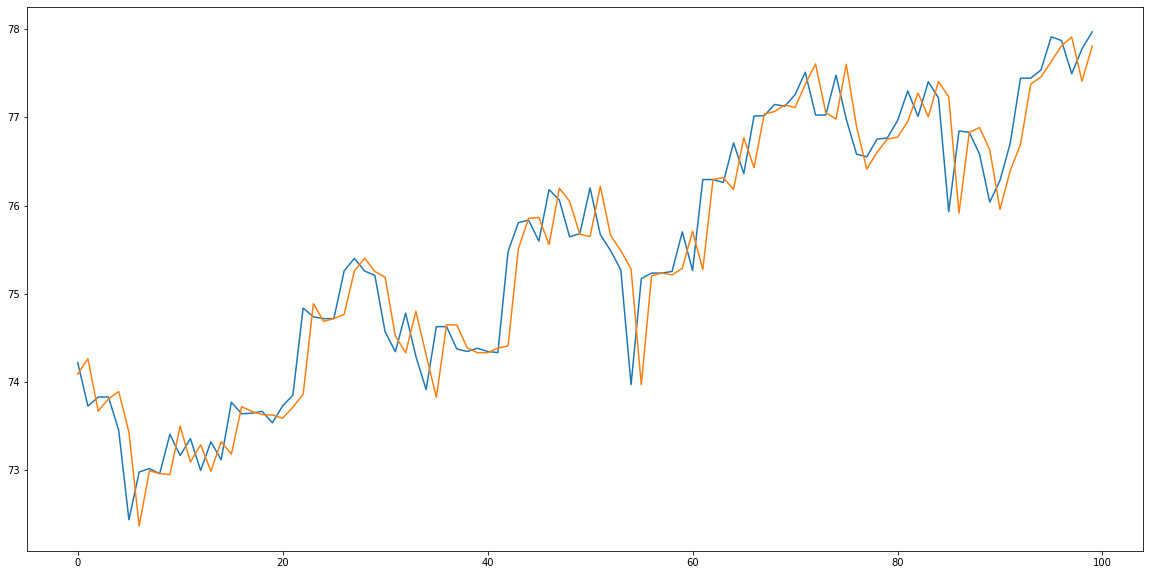

In [ ]:
sum_list = [a + b for a, b in zip(pred_lin, test['Average'].values)]
#sum_list=np.array(sum_list)
tar_list=[a + b for a, b in zip(test['Target'].values, test['Average'].values)]
plt.figure(figsize=(20,10))
plt.plot(tar_list[200:300])
plt.plot(sum_list[200:300])
plt.show()

In [ ]:
x=0
Dec=[]
while x<1099:
  if test['Target'][x]>test['Target'][x-1]:
    Dec.append("Buy")
  elif test['Target'][x]<test['Target'][x-1]:
    Dec.append("Sell")
  else:
    Dec.append("Hold")
  x+=1
Target = Dec


x=0
Dec=[]
while x<1099:
  if pred_lin[x]>pred_lin[x-1]:
    Dec.append("Sell")
  elif pred_lin[x]<pred_lin[x-1]:
    Dec.append("Buy")
  else:
    Dec.append("Hold")
  x+=1
#test['Decision2'] = Dec

print(classification_report(Target,Dec))

              precision    recall  f1-score   support

         Buy       0.52      0.53      0.53       535
        Hold       0.00      0.00      0.00         1
        Sell       0.55      0.53      0.54       563

    accuracy                           0.53      1099
   macro avg       0.36      0.35      0.35      1099
weighted avg       0.53      0.53      0.53      1099



Sentiment Counter Trading

# **RNN**

In [ ]:
daily=pd.read_csv('/content/gdrive/My Drive/Data606/Data/Daily.csv')
daily=daily.rename({1:'publish_date'},axis=1)
daily=daily.fillna(0)
train,test=train_test_split(daily,test_size=0.25,shuffle=False)

In [ ]:
import re
words=' '.join(daily['headline_text']).split(' ')
words=set(words)
tokens=len(words)

In [ ]:
"""
monthly=pd.read_csv('/content/gdrive/My Drive/Data606/Data/Monthly.csv')
monthly=monthly.set_index(['year','month'])
train=monthly[(monthly.index.get_level_values('year') <= 2015) & (monthly.index.get_level_values('year') > 2003)]
test=monthly[monthly.index.get_level_values('year') > 2015]"""

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# **Regression Training**

In [ ]:
tokenizer = Tokenizer(num_words=tokens)
tokenizer.fit_on_texts(train.headline_text.values)
train_X = pad_sequences(tokenizer.texts_to_sequences(train.headline_text.values), 256)
test_X = pad_sequences(tokenizer.texts_to_sequences(test.headline_text.values),256)
#Categorial
#train_Y=tf.keras.utils.to_categorical(train['Decision'], num_classes=3)
#test_Y=tf.keras.utils.to_categorical(test['Decision'], num_classes=3)

#Regression
#train_Y=np.append(train['Change'].values[1:],0)
#test_Y=np.append(test['Change'].values[1:],0)
train_Y=np.append(train['Average Price'].diff().values[1:],train['Average Price'].diff().values[-1])
test_Y=np.append(test['Average Price'].diff().values[1:],test['Average Price'].diff().values[-1])

#Sentiment
train_sent = train[['sent_neg','sent_nue','sent_pos','sent_comp']].values
test_sent = test[['sent_neg','sent_nue','sent_pos','sent_comp']].values
train_sent = train_sent.reshape((train_sent.shape[0], 1, train_sent.shape[1]))
test_sent = test_sent.reshape((test_sent.shape[0], 1, test_sent.shape[1]))
print(train_sent.shape, train_Y.shape, test_sent.shape, test_Y.shape)

#Price
train_price = train[['Average Price']].values
test_price = test[['Average Price']].values
train_price = train_price.reshape((train_price.shape[0], 1, train_price.shape[1]))
test_price = test_price.reshape((test_price.shape[0], 1, test_price.shape[1]))

#Sent+Price
train_all = train[['Average Price','sent_neg','sent_nue','sent_pos','sent_comp']].values
test_all = test[['Average Price','sent_neg','sent_nue','sent_pos','sent_comp']].values
train_all = train_all.reshape((train_all.shape[0], 1, train_all.shape[1]))
test_all = test_all.reshape((test_all.shape[0], 1, test_all.shape[1]))
print(train_all.shape, train_Y.shape, test_all.shape, test_Y.shape)



(3295, 1, 4) (3295,) (1099, 1, 4) (1099,)
(3295, 1, 5) (3295,) (1099, 1, 5) (1099,)


Just Text

In [ ]:
embed_dim = 128
lstm_out = 196
max_features = 1000
model = Sequential()
model.add(Embedding(tokenizer.num_words,256))
model.add(Bidirectional(LSTM(256,dropout=.1)))
model.add(Dense(64))
model.add(LeakyReLU(alpha=.1))
model.add(Dense(1))
#model.add(LeakyReLU(alpha=.1))
model.compile(loss='mse',
              optimizer='adam')
              #metrics=['accuracy',f1_m,precision_m, recall_m])

filepath="/content/gdrive/My Drive/Data606/Models/Text_weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
batch_size = 5
model.fit(train_X,
          train_Y,
          epochs = 5, 
          batch_size=batch_size,
          callbacks=callbacks_list, 
          verbose = 1, 
          validation_data=(test_X, test_Y))

Epoch 1/5
659/659 [==============================] - ETA: 0s - loss: 0.1868
Epoch 00001: val_loss improved from inf to 0.09682, saving model to /content/gdrive/My Drive/Data606/Models/Text_weights_best.hdf5
659/659 [==============================] - 202s 306ms/step - loss: 0.1868 - val_loss: 0.0968
Epoch 2/5
659/659 [==============================] - ETA: 0s - loss: 0.1620
Epoch 00002: val_loss did not improve from 0.09682
659/659 [==============================] - 192s 291ms/step - loss: 0.1620 - val_loss: 0.1071
Epoch 3/5
659/659 [==============================] - ETA: 0s - loss: 0.1350
Epoch 00003: val_loss did not improve from 0.09682
659/659 [==============================] - 184s 279ms/step - loss: 0.1350 - val_loss: 0.1157
Epoch 4/5
659/659 [==============================] - ETA: 0s - loss: 0.0620
Epoch 00004: val_loss did not improve from 0.09682
659/659 [==============================] - 183s 278ms/step - loss: 0.0620 - val_loss: 0.1122
Epoch 5/5
659/659 [=====================

In [ ]:
test_Y.shape

Text+Sentiment

In [ ]:
from keras.models import Model
from keras.layers import Concatenate, Dense, LSTM, Bidirectional, Input, concatenate,Embedding

text = Input(
    shape=(None,), name="Headlines"
)  # Variable-length sequence of ints

sent = Input(
    shape=(1,4),name="Sentiment"
)
Embed =Embedding(tokenizer.num_words,512)(text)
text_features = Bidirectional(LSTM(512,dropout=.1))(Embed)
first_dense = Dense(64)(text_features)
relu1 =LeakyReLU(alpha=.1)(first_dense)

sent_features=LSTM(128)(sent)
second_dense = Dense(128)(sent_features)
relu2=LeakyReLU(alpha=.1)(second_dense)

merged = Concatenate(axis=1)([relu1,relu2])
f_dense= Dense(64)(merged)
relu3=LeakyReLU(alpha=.1)(f_dense)
t_dense= Dense(1)(relu3)
relu4=LeakyReLU(alpha=.1)(t_dense)

model = Model(inputs=[text, sent], outputs=relu4)
model.compile(loss='mse',
              optimizer='adam')
              #metrics=['accuracy',f1_m,precision_m, recall_m])

filepath="/content/gdrive/My Drive/Data606/Models/TextSent_weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
batch_size = 5
model.fit({'Headlines':train_X,'Sentiment':train_sent},
          train_Y,
          epochs = 5, 
          batch_size=batch_size, 
          callbacks=callbacks_list, 
          verbose = 1, 
          validation_data=({'Headlines':test_X,'Sentiment':test_sent},test_Y))

Test+Price(Best)

In [ ]:
from keras.models import Model
from keras.layers import Concatenate, Dense, LSTM, Bidirectional, Input, concatenate,Embedding

text = Input(
    shape=(None,), name="Headlines"
)  # Variable-length sequence of ints

price = Input(
    shape=(1,1),name="Price"
)
Embed =Embedding(tokenizer.num_words,512)(text)
text_features = Bidirectional(LSTM(512,dropout=.1))(Embed)
first_dense = Dense(64)(text_features)
relu1 =LeakyReLU(alpha=.1)(first_dense)

price_features=LSTM(64,dropout=.2)(price)
second_dense = Dense(64)(price_features)
relu2=LeakyReLU(alpha=.1)(second_dense)

merged = Concatenate(axis=1)([relu1,relu2])
f_dense= Dense(64)(merged)
relu3=LeakyReLU(alpha=.1)(f_dense)
t_dense= Dense(1)(relu3)
relu4=LeakyReLU(alpha=.1)(t_dense)

model = Model(inputs=[text, price], outputs=relu4)
model.compile(loss='mse',
              optimizer='adam')
              #metrics=['accuracy',f1_m,precision_m, recall_m])

filepath="/content/gdrive/My Drive/Data606/Models/TextPrice_weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
batch_size = 10
model.fit({'Headlines':train_X,'Price':train_price},
          train_Y,
          epochs = 10, 
          batch_size=batch_size,
          callbacks=callbacks_list, 
          verbose = 1, 
          validation_data=({'Headlines':test_X,'Price':test_price},test_Y))

Epoch 1/10
330/330 [==============================] - ETA: 0s - loss: 148.1923
Epoch 00001: val_loss improved from inf to 51.60986, saving model to /content/gdrive/My Drive/Data606/Models/TextPrice_weights_best.hdf5
330/330 [==============================] - 182s 553ms/step - loss: 148.1923 - val_loss: 51.6099
Epoch 2/10
330/330 [==============================] - ETA: 0s - loss: 16.9220
Epoch 00002: val_loss did not improve from 51.60986
330/330 [==============================] - 179s 543ms/step - loss: 16.9220 - val_loss: 148.6960
Epoch 3/10
330/330 [==============================] - ETA: 0s - loss: 6.6194
Epoch 00003: val_loss did not improve from 51.60986
330/330 [==============================] - 179s 542ms/step - loss: 6.6194 - val_loss: 223.1401
Epoch 4/10
141/330 [===========>..................] - ETA: 1:39 - loss: 6.1592

KeyboardInterrupt: ignored

Text+Price+Sent

In [ ]:
np.isnan(test_Y).sum()

In [ ]:
from keras.models import Model
from keras.layers import Concatenate, Dense, LSTM, Bidirectional, Input, concatenate,Embedding

text = Input(
    shape=(None,), name="Headlines"
)  # Variable-length sequence of ints

all = Input(
    shape=(1,5),name="All"
)
Embed =Embedding(tokenizer.num_words,512)(text)
text_features = Bidirectional(LSTM(512,dropout=.1))(Embed)
first_dense = Dense(64)(text_features)
relu1 =LeakyReLU(alpha=.1)(first_dense)

all_features=LSTM(256)(all)
second_dense = Dense(256)(all_features)
relu2=LeakyReLU(alpha=.1)(second_dense)

merged = Concatenate(axis=1)([relu1,relu2])
f_dense= Dense(64)(merged)
relu3=LeakyReLU(alpha=.1)(f_dense)
t_dense= Dense(1)(relu3)
relu4=LeakyReLU(alpha=.1)(t_dense)

model = Model(inputs=[text, all], outputs=relu4)
model.compile(loss='mse',
              optimizer='adam')
              #metrics=['accuracy',f1_m,precision_m, recall_m])

filepath="/content/gdrive/My Drive/Data606/Models/All_weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
batch_size = 5
model.fit({'Headlines':train_X,'All':train_all},
          train_Y,
          epochs = 5, 
          batch_size=batch_size,
          callbacks=callbacks_list, 
          verbose = 1, 
          validation_data=({'Headlines':test_X,'All':test_all},test_Y))

Epoch 1/5
659/659 [==============================] - ETA: 0s - loss: 75.7527
Epoch 00001: val_loss improved from inf to 1.61798, saving model to /content/gdrive/My Drive/Data606/Models/All_weights_best.hdf5
659/659 [==============================] - 371s 563ms/step - loss: 75.7527 - val_loss: 1.6180
Epoch 2/5
659/659 [==============================] - ETA: 0s - loss: 0.9669
Epoch 00002: val_loss improved from 1.61798 to 0.42302, saving model to /content/gdrive/My Drive/Data606/Models/All_weights_best.hdf5
659/659 [==============================] - 360s 547ms/step - loss: 0.9669 - val_loss: 0.4230
Epoch 3/5
659/659 [==============================] - ETA: 0s - loss: 0.5203
Epoch 00003: val_loss improved from 0.42302 to 0.17242, saving model to /content/gdrive/My Drive/Data606/Models/All_weights_best.hdf5
659/659 [==============================] - 364s 552ms/step - loss: 0.5203 - val_loss: 0.1724
Epoch 4/5
659/659 [==============================] - ETA: 0s - loss: 0.5646
Epoch 00004: val_

# **Model Loading**

Text

In [ ]:
embed_dim = 128
lstm_out = 196
max_features = 1000
model = Sequential()
model.add(Embedding(tokenizer.num_words,256))
model.add(Bidirectional(LSTM(256,dropout=.1)))
model.add(Dense(64))
model.add(LeakyReLU(alpha=.1))
model.add(Dense(1))
#model.add(LeakyReLU(alpha=.1))
model.compile(loss='mse',
              optimizer='adam')
              #metrics=['accuracy',f1_m,precision_m, recall_m])

model.load_weights("/content/gdrive/My Drive/Data606/Models/Text_weights_best.hdf5")
# Compile model (required to make predictions)
model.compile(loss='mse', optimizer='adam')
print("Created model and loaded weights from file")

Created model and loaded weights from file


Text+Price

In [ ]:
# load weights 
from keras.models import Model
from keras.layers import Concatenate, Dense, LSTM, Bidirectional, Input, concatenate,Embedding

text = Input(
    shape=(None,), name="Headlines"
)  # Variable-length sequence of ints

price = Input(
    shape=(1,1),name="Price"
)
Embed =Embedding(tokenizer.num_words,512)(text)
text_features = Bidirectional(LSTM(512,dropout=.1))(Embed)
first_dense = Dense(64)(text_features)
relu1 =LeakyReLU(alpha=.1)(first_dense)

price_features=LSTM(64,dropout=.1)(price)
second_dense = Dense(64)(price_features)
relu2=LeakyReLU(alpha=.1)(second_dense)

merged = Concatenate(axis=1)([relu1,relu2])
f_dense= Dense(64)(merged)
relu3=LeakyReLU(alpha=.1)(f_dense)
t_dense= Dense(1)(relu3)
relu4=LeakyReLU(alpha=.1)(t_dense)

model = Model(inputs=[text, price], outputs=relu4)

model.load_weights("/content/gdrive/My Drive/Data606/Models/TextPrice_weights_best.hdf5")
# Compile model (required to make predictions)
model.compile(loss='mse', optimizer='adam')
print("Created model and loaded weights from file")

Created model and loaded weights from file


All Inputs

In [ ]:
text = Input(
    shape=(None,), name="Headlines"
)  # Variable-length sequence of ints

all = Input(
    shape=(1,5),name="All"
)
Embed =Embedding(tokenizer.num_words,512)(text)
text_features = Bidirectional(LSTM(512,dropout=.1))(Embed)
first_dense = Dense(64)(text_features)
relu1 =LeakyReLU(alpha=.1)(first_dense)

all_features=LSTM(256)(all)
second_dense = Dense(256)(all_features)
relu2=LeakyReLU(alpha=.1)(second_dense)

merged = Concatenate(axis=1)([relu1,relu2])
f_dense= Dense(64)(merged)
relu3=LeakyReLU(alpha=.1)(f_dense)
t_dense= Dense(1)(relu3)
relu4=LeakyReLU(alpha=.1)(t_dense)


model = Model(inputs=[text, all], outputs=relu4)

model.load_weights("/content/gdrive/My Drive/Data606/Models/All_weights_best.hdf5")
model.compile(loss='mse',
              optimizer='adam')
              #metrics=['accuracy',f1_m,precision_m, recall_m])

# **Oscillator**

In [ ]:
#Text
pred=np.reshape(model.predict(test_X),(1099,))

#price+text
#pred=np.reshape(model.predict({'Headlines':test_X,'Price':test_price}),(1099,))

#price+text+sentiment
#pred=np.reshape(model.predict({'Headlines':test_X,'All':test_all}),(1099,))
pred2 = [a + b for a, b in zip(pred, test['Average Price'].values)]
test_Y2 = [a + b for a, b in zip(test_Y, test['Average Price'].values)]

"""
while x<1099:
  pred2.append(sum(pred[:x]))
  test_Y2.append(sum(test_Y[:x]))
  x+=1"""

'\nwhile x<1099:\n  pred2.append(sum(pred[:x]))\n  test_Y2.append(sum(test_Y[:x]))\n  x+=1'

In [ ]:
def moving_average(a, n=2) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n-1:] / n

In [ ]:
def isPeak(arr, n, num, i, j):

    # If num is smaller than the element
    # on the left (if exists)
    if (i >= 0 and arr[i] > num):
        return False

    # If num is smaller than the element
    # on the right (if exists)
    if (j < n and arr[j] > num):
        return False
    return True

# Function that returns true if num is
# smaller than both arr[i] and arr[j]
def isTrough(arr, n, num, i, j):

    # If num is greater than the element
    # on the left (if exists)
    if (i >= 0 and arr[i] < num):
        return False

    # If num is greater than the element
    # on the right (if exists)
    if (j < n and arr[j] < num):
        return False
    return True


def peak_trough(data):
    arr=data
    n = len(arr)
    peak_ind = []
    valley_ind = []

    for i in range(n):
        # If the current element is a peak
        if (isPeak(arr, n, arr[i], i - 1, i + 1)):
            # print(arr[i], end = " ")
            peak_ind.append(True)
        else:
            peak_ind.append(False)

    for i in range(n):
        # If the current element is a trough
        if (isTrough(arr, n, arr[i], i - 1, i + 1)):
            # print(arr[i], end = " ")
            valley_ind.append(True)
        else:
            valley_ind.append(False)
    return peak_ind,valley_ind


def Oscillator(data):
    #last peak index
    pind=0
    p=0
    p_flag=False
    #last trough index
    tind=0
    t=0
    t_flag=False
    #Estimation
    dist_X=0
    dist_Y=0
    Est=[]
    x=1
    limit=len(data)-1
    while x<=limit:
      #Loop can only look backwards
      #Find most recent peak and trough
      peak,trough=peak_trough(data[:x])
      pind=len(peak) - 1 - peak[::-1].index(True)
      p=data[pind]
      tind=len(trough) - 1 - trough[::-1].index(True)
      t=data[tind]

      #Assign first estimation hardcoded
      if x==1:
        x+=1
        Est.append(0)
      #First trough estimation is the inverse of the peak
      elif t==0:
        x+=1
        Est.append(-p)

      #Check to see if data has breached last peak
      elif data[x]>p:
        p=data[x]
        pind=x
        if pind>tind:
          dist_X=pind-tind
          dist_Y=(p+abs(t))
          #Est.append(data[x]+dist_Y)
        elif tind>pind:
          dist_X=tind-pind
          dist_Y=(t+p)
          #Est.append(data[x]+dist_Y)
        
        #distribute estimated change over number of estimated days
        for z in range(dist_X):
          Est.append(data[x-1]+(dist_Y/dist_X))
          x+=1

      #Check to see if data has breached last trough
      elif data[x]<t:
        t=data[x]
        tind=x
        if pind>tind:
          dist_X=pind-tind
          dist_Y=(p+abs(t))
          #Est.append(data[x]+dist_Y)
        elif tind>pind:
          dist_X=tind-pind
          dist_Y=(t+p)
          #Est.append(data[x]+dist_Y)

        for z in range(dist_X):
          Est.append(data[x-1]+(dist_Y/dist_X))
          x+=1

      #Check to see if data has breached last peak
      else:
        if pind>tind:
          dist_X=pind-tind
          dist_Y=(p+abs(t))
          #Est.append(data[x]+dist_Y)
        elif tind>pind:
          dist_X=tind-pind
          dist_Y=(t+p)
          #Est.append(data[x]+dist_Y)

        for z in range(dist_X):
          Est.append(data[x-1]+(dist_Y/dist_X))
          x+=1
    
    return Est



def Oscillator2(data):
    #last peak index
    pind=0
    p=0
    p_flag=False
    #last trough index
    tind=0
    t=0
    t_flag=False
    #Estimation
    dist_X=0
    dist_Y=0
    Est=[]
    x=1
    limit=len(data)-1
    while x<limit:
      #print("X: "+str(x))
      #print("Actual: "+str(data[x]))
      #print(data[:x])

      #Loop can only look backwards
      #Find most recent peak and trough
      peak,trough=peak_trough(data[:x])
      pind=len(peak) - 1 - peak[::-1].index(True)
      p=data[pind]
      tind=len(trough) - 1 - trough[::-1].index(True)
      t=data[tind]
      #Assign first estimation hardcoded
      if x==1:
        x+=1
        Est.append(0)
      #First trough estimation is the inverse of the peak
      elif t==0:
        x+=1
        Est.append(-p)
      #Else compare positions of last peak and trough. Use distances to estimate next position
      else:
        
        if pind>tind:
          dist_X=pind-tind
          dist_Y=(p+abs(t))
          
        elif tind>pind:
          dist_X=tind-pind
          dist_Y=(t+p)

        for z in range(dist_X):
          Est.append(data[x-1]+(dist_Y/dist_X))
          x+=1
      
    return np.append(Est,0)

      

In [ ]:
#Check to make sure loop only looks backwards
x=1
limit=10
while x<=limit:
  #print("X: "+str(x))
  print("Actual: "+str(test_Y[x]))
  print(test_Y[:x])
  x+=1

Actual: 0.03840000000000998
[0.54191818]
Actual: -0.05835000000000434
[0.54191818 0.0384    ]
Actual: 0.4468863636363807
[ 0.54191818  0.0384     -0.05835   ]
Actual: -0.24087272727274467
[ 0.54191818  0.0384     -0.05835     0.44688636]
Actual: 0.19246363636364094
[ 0.54191818  0.0384     -0.05835     0.44688636 -0.24087273]
Actual: -0.3613454545454715
[ 0.54191818  0.0384     -0.05835     0.44688636 -0.24087273  0.19246364]
Actual: 0.32566363636365736
[ 0.54191818  0.0384     -0.05835     0.44688636 -0.24087273  0.19246364
 -0.36134545]
Actual: -0.20460909090908785
[ 0.54191818  0.0384     -0.05835     0.44688636 -0.24087273  0.19246364
 -0.36134545  0.32566364]
Actual: 0.653109090909112
[ 0.54191818  0.0384     -0.05835     0.44688636 -0.24087273  0.19246364
 -0.36134545  0.32566364 -0.20460909]
Actual: -0.13148181818185378
[ 0.54191818  0.0384     -0.05835     0.44688636 -0.24087273  0.19246364
 -0.36134545  0.32566364 -0.20460909  0.65310909]


# **Visualization**

In [ ]:
Osc=Oscillator2(test_Y)
len(Osc)

1099

<Figure size 864x432 with 0 Axes>

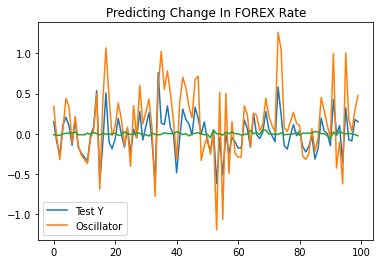

<Figure size 864x432 with 0 Axes>

In [ ]:

#plt.legend(['Pred','Label','Oscillator'],loc="upper left")
fig, ax = plt.subplots()
ax.plot(test_Y[400:500],label='Test Y')
ax.plot(Osc[400:500],label='Oscillator')
ax.plot(pred[400:500])

leg = ax.legend()
plt.title('Predicting Change In FOREX Rate')
plt.figure(figsize=(12,6))

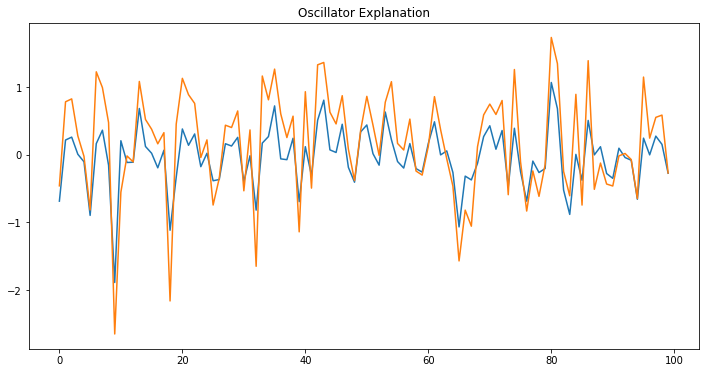

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_Y[100:200])
plt.plot(Osc[100:200])
plt.title("Oscillator Explanation")
plt.show()

In [ ]:
money=pd.DataFrame.from_records(peak_trough(test_Y)).T.rename(columns={0:'Peak',1:'Trough'})
money['Pred']=pred
money['Oscillator']=Osc
money['Change']=test['Average Price'].pct_change().values


#Actual Label
x=0
Dec=[]
while x<1099:
  if x==1098:
    Dec.append("Hold")
  else:
    if money['Change'][x+1]>0:
      Dec.append("Sell")
    elif money['Change'][x+1]<0:
      Dec.append("Buy")
    else:
      Dec.append("Hold")
  x+=1
money['Label'] = Dec


#Predicted Label
#Convert prediction into decision
x=0
Dec=[]
while x<1099:
  #
  if money['Oscillator'][x]>0:
    Dec.append("Sell")
  elif money['Oscillator'][x]<0:
    Dec.append("Buy")
  else:
    Dec.append("Hold")
  #else:
   #  Dec.append("Hold")
  x+=1
money['Decision2'] = Dec

money.tail(10)

,Peak,Trough,Pred,Oscillator,Change,Label,Decision2
1089,False,False,-0.012102,-0.179050,0.001305,Buy,Buy
1090,False,True,-0.007317,-0.286368,-0.001824,Buy,Buy
1091,True,False,-0.002771,0.101491,-0.002940,Sell,Sell
1092,False,False,0.002465,0.120791,0.002155,Buy,Sell
1093,False,True,0.030660,-0.043727,-0.000282,Buy,Buy
1094,True,False,0.008704,0.040018,-0.001100,Hold,Sell
1095,False,False,-0.015416,-0.070709,0.000000,Buy,Buy
1096,False,True,-0.002117,-0.409609,-0.000465,Buy,Buy
1097,True,False,-0.010492,-0.188923,-0.003593,Buy,Buy
1098,True,True,0.069881,0.000000,-0.000692,Hold,Hold


In [ ]:
mean_squared_error(test_Y,Osc)

0.1369084361532071

0.7657247037374658
14.861374589250953


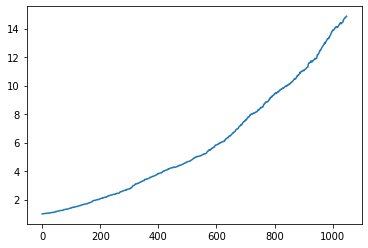

In [ ]:
#Binary accuracy
x=0
y=0
z=0
while x<1099:
  if money['Decision2'][x]=='Hold':
    x+=1
    continue
  elif money['Decision2'][x]==money['Label'][x]:
    y+=1
    z+=1
    x+=1
  elif money['Decision2'][x]!=money['Label'][x]:
    z+=1
    x+=1
    
print(y/z)



#Return with $1
#accumulated % change
x=0
y=1
z=0
lst=[]
while x<1099:
  
  if money['Change'][x]>0 and money['Decision2'][x-1]=='Sell': 
    y = y*(1+money['Change'][x])
    x+=1
    lst.append(y)
  elif money['Change'][x]<0 and money['Decision2'][x-1]=='Buy':
    y = y*(1+abs(money['Change'][x]))
    x+=1
    lst.append(y)
  elif money['Change'][x]<0 and money['Decision2'][x-1]=='Sell':
    y = y*(1+money['Change'][x])
    x+=1
    lst.append(y)
  elif money['Change'][x]>0 and money['Decision2'][x-1]=='Buy': 
    y = y*(1-money['Change'][x])
    x+=1
    lst.append(y)
  else:
    x+=1
    continue
    

print(y)
plt.show(lst)
plt.plot(lst)

2.7082858537798016


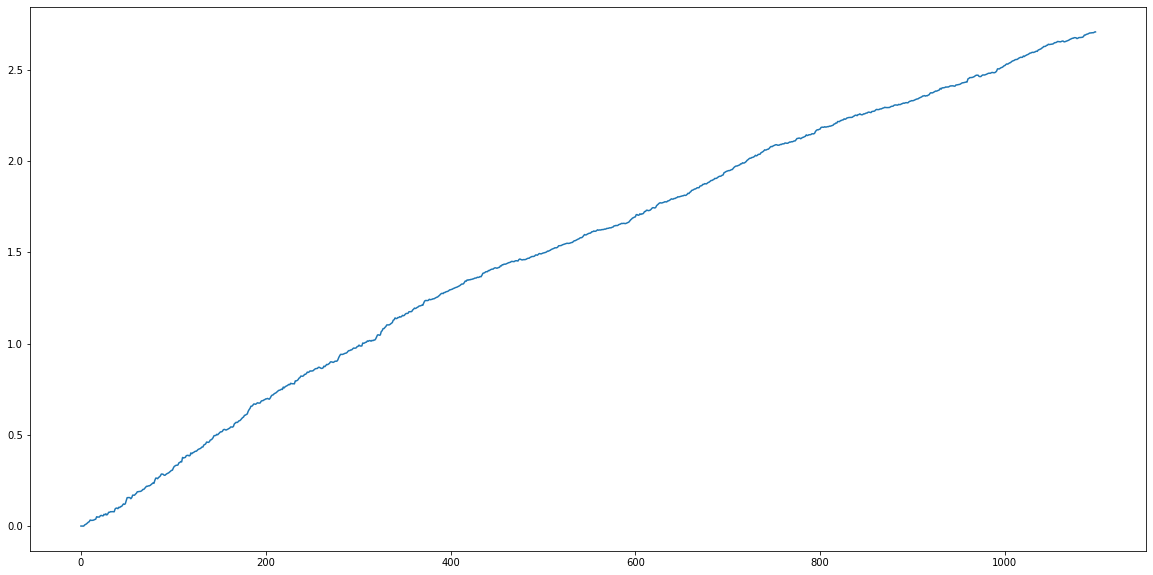

In [ ]:
x=0
y=0
lst=[]
while x<1099:
  
  if money['Change'][x]>0 and money['Decision2'][x-1]=='Sell': 
    y+=money['Change'][x]
    lst.append(y)
  elif money['Change'][x]<0 and money['Decision2'][x-1]=='Buy':
    y+=abs(money['Change'][x])
    lst.append(y)
  elif money['Change'][x]<0 and money['Decision2'][x-1]=='Sell':
    y+=money['Change'][x]
    lst.append(y)
  elif money['Change'][x]>0 and money['Decision2'][x-1]=='Buy': 
    y-=money['Change'][x]
    lst.append(y)
  else:
    lst.append(y)
  x+=1

print(y)
plt.figure(figsize=(20,10))
plt.plot(lst)
plt.show()

# **Evaluation**

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

In [ ]:
def multiclass_roc_curve(y_test, y_pred, average="macro"):
  y_test = label_binarize(y_test, classes=["Buy","Sell","Hold"])
  y_pred = label_binarize(y_pred, classes=["Buy","Sell","Hold"])
  n_classes=3
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  
  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(1,n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
  
  lw=2
  plt.figure(figsize=(14,10))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  
  
  # Plot all ROC curves
  
  plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

  colors = ['aqua', 'darkorange', 'cornflowerblue','green','yellow']
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")

  plt.show()

In [ ]:
accuracy_score(money['Label'],money['Decision2'])

0.7661510464058234

In [ ]:
print(classification_report(money['Label'],money['Decision2']))

              precision    recall  f1-score   support

         Buy       0.87      0.65      0.74       514
        Hold       0.67      0.04      0.08        49
        Sell       0.71      0.94      0.81       536

    accuracy                           0.77      1099
   macro avg       0.75      0.54      0.54      1099
weighted avg       0.78      0.77      0.75      1099



In [ ]:
multiclass_roc_auc_score(money['Label'],money['Decision2'],average="micro")

0.8246132848043676

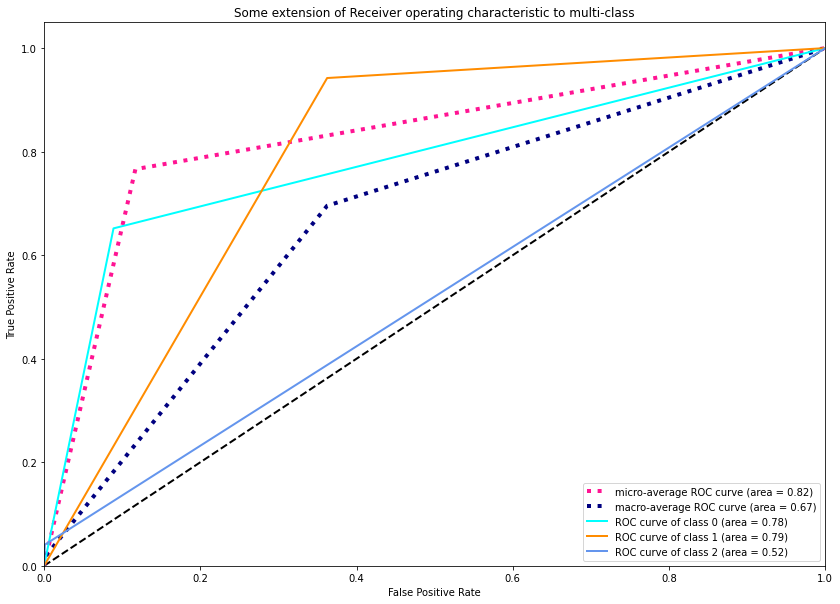

In [ ]:
multiclass_roc_curve(money['Label'],money['Decision2'])

Testing Results Against Individual Currencies

In [ ]:
path=F'/content/gdrive/My Drive/Data606/Data/Foreign_Exchange_Rates.csv'
df=pd.read_csv(path)
df=df.drop('Unnamed: 0', axis=1)
df=df.replace(to_replace='ND', value=np.NaN)
df=df.set_index('Time Serie')
df = df.apply(pd.to_numeric)
df.head(1000)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.9640,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.9340,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.9350,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.9400,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-10-27,1.4209,0.8502,1.6402,0.5899,2.8710,1.3107,8.2767,7.7541,45.40,1183.0,11.1195,6.880,1.7430,6.3230,108.38,3.8,7.0230,7.7250,94.45,1.3159,33.95,39.99
2003-10-28,1.4182,0.8555,1.6340,0.5898,2.8625,1.3108,8.2766,7.7578,45.31,1186.0,11.0670,6.950,1.7455,6.3594,108.33,3.8,7.0364,7.7478,94.62,1.3287,33.95,39.98
2003-10-29,1.4190,0.8567,1.6329,0.5887,2.8540,1.3098,8.2766,7.7595,45.36,1179.0,11.1500,6.920,1.7362,6.3670,108.18,3.8,7.0534,7.7181,94.62,1.3293,33.95,39.95


In [ ]:
Eval=df[-1099:].fillna(0).pct_change().assign(decision = money['Decision2'].values)
Eval2=df[-1099:].fillna(0).diff()

In [ ]:
Eval2

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,,
2015-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-16,0.0103,0.0045,0.0118,0.0014,0.0107,0.0031,0.0064,0.0002,-0.07,9.83,-0.0460,0.0295,0.0059,0.0316,1.34,0.0500,-0.0051,-0.0068,0.30,0.0047,0.29,0.12
2015-10-19,0.0013,0.0031,-0.0011,-0.0012,0.0478,0.0067,0.0068,0.0000,0.20,-0.16,0.1405,0.1675,0.0028,0.0243,-0.10,0.0350,0.0221,0.0968,0.00,0.0024,0.17,0.18
2015-10-20,-0.0003,-0.0030,0.0107,0.0000,-0.0160,-0.0025,-0.0111,-0.0001,0.07,-1.93,0.0490,-0.0190,0.0031,-0.0234,0.29,0.0550,-0.0075,-0.0366,0.37,-0.0020,-0.06,-0.02
2015-10-21,0.0057,0.0010,0.0046,0.0003,0.0669,0.0143,0.0007,0.0004,0.22,8.45,0.0935,0.2360,0.0038,0.0083,0.12,0.0150,0.0605,0.0375,0.07,0.0030,0.18,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,-1.4445,-0.9022,-1.5058,-0.7719,-4.0833,-1.3160,-7.0064,-7.7872,-71.23,-1163.21,-18.9550,-14.1430,-1.3550,-6.7399,-109.38,-4.1350,-8.9142,-9.4133,-181.30,-0.9807,-30.14,-30.15
2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,71.28,1161.18,18.9440,14.1320,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
2019-12-27,-0.0080,-0.0058,-0.0083,-0.0049,-0.0095,-0.0051,0.0005,-0.0006,0.17,-0.31,-0.1250,-0.1070,-0.0020,-0.0466,-0.20,-0.0077,-0.0508,-0.0703,0.05,-0.0067,-0.02,-0.01


In [ ]:
cols=list(Eval.columns.values[:22])
acc=[]
for i in range(21):
  x=0
  Dec=[]
  while x<1099:
    if x==1098:
      Dec.append("Hold")
    else:
      if Eval.iloc[x+1,i]>0:
        Dec.append("Sell")
      elif Eval.iloc[x+1,i]<0:
        Dec.append("Buy")
      else:
        Dec.append("Hold")
    x+=1
  acc.append(accuracy_score(Dec,Eval['decision']))

pd.DataFrame.from_records([cols,acc]).T
    

,0,1
0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,0.630573
1,EURO AREA - EURO/US$,0.578708
2,NEW ZEALAND - NEW ZELAND DOLLAR/US$,0.611465
3,UNITED KINGDOM - UNITED KINGDOM POUND/US$,0.578708
4,BRAZIL - REAL/US$,0.581438
5,CANADA - CANADIAN DOLLAR/US$,0.593267
6,CHINA - YUAN/US$,0.55505
7,HONG KONG - HONG KONG DOLLAR/US$,0.530482
8,INDIA - INDIAN RUPEE/US$,0.600546
9,KOREA - WON/US$,0.742493


22
22


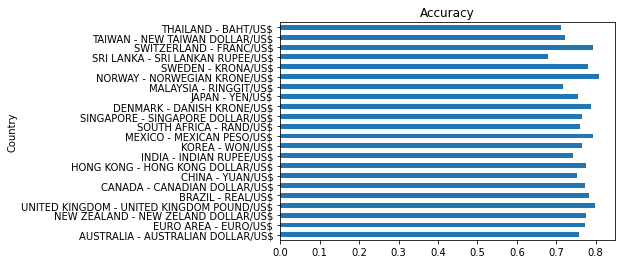

In [ ]:
cols=list(Eval.columns.values[:22])
acc=[]
for i in range(22):
  #print(len(Eval2))
  Os=Oscillator2(np.append(Eval2.iloc[:,i].values[1:],Eval2.iloc[:,i].values[-1]))
  #print(len(Os))
  x=0
  Dec=[]
  while x<1098:
    if Os[x]>0:
      Dec.append("Sell")
    elif Os[x]<0:
      Dec.append("Buy")
    else:
      Dec.append("Hold")
    x+=1

  x=0
  Dec2=[]
  while x<1098:
    if x==1098:
      Dec.append("Hold")
    else:
      if Eval.iloc[x+1,i]>0:
        Dec2.append("Sell")
      elif Eval.iloc[x+1,i]<0:
        Dec2.append("Buy")
      else:
        Dec2.append("Hold")
    x+=1
  acc.append(accuracy_score(Dec,Dec2))
print(len(acc))
print(len(cols))
pd.DataFrame({'Country':cols,'Accuracy':acc}).plot.barh(x='Country',y='Accuracy',title='Accuracy',legend=False)